# Lab 4

# This lab exercise is based a real question I received via email from someone at Tippecanoe Co. Public Library. 
<blockquote> <span style="color:darkblue">Question:  Does the Downtown Library location on South Street provide any protection from high winds and [...] possible severe weather damages. Specifically, are we more protected in the valley created by Wabash River, between the hillside of West Lafayette and the high point of Five Points intersection in Lafayette?</span></blockquote>

There isn't a weather station at the TCPL downtown branch itself. However, there are two WHIN stations nearby, one at Columbian Park in Lafayette, and the other at the Pedestrian Footbridge over the Wabash River.  Fortuitously, TPCL's downtown branch lies almost exactly on a line connecting them. 

Zach Mason, a data analyst at WHIN, graciously provided all the 2021 data (thus far) from these two stations for this assignment. $\leftarrow$ <i>That's a cue to acknowledge him in your lab reports!</i>

For reference, the land slopes down from east to west, reaching a minimum at the river.
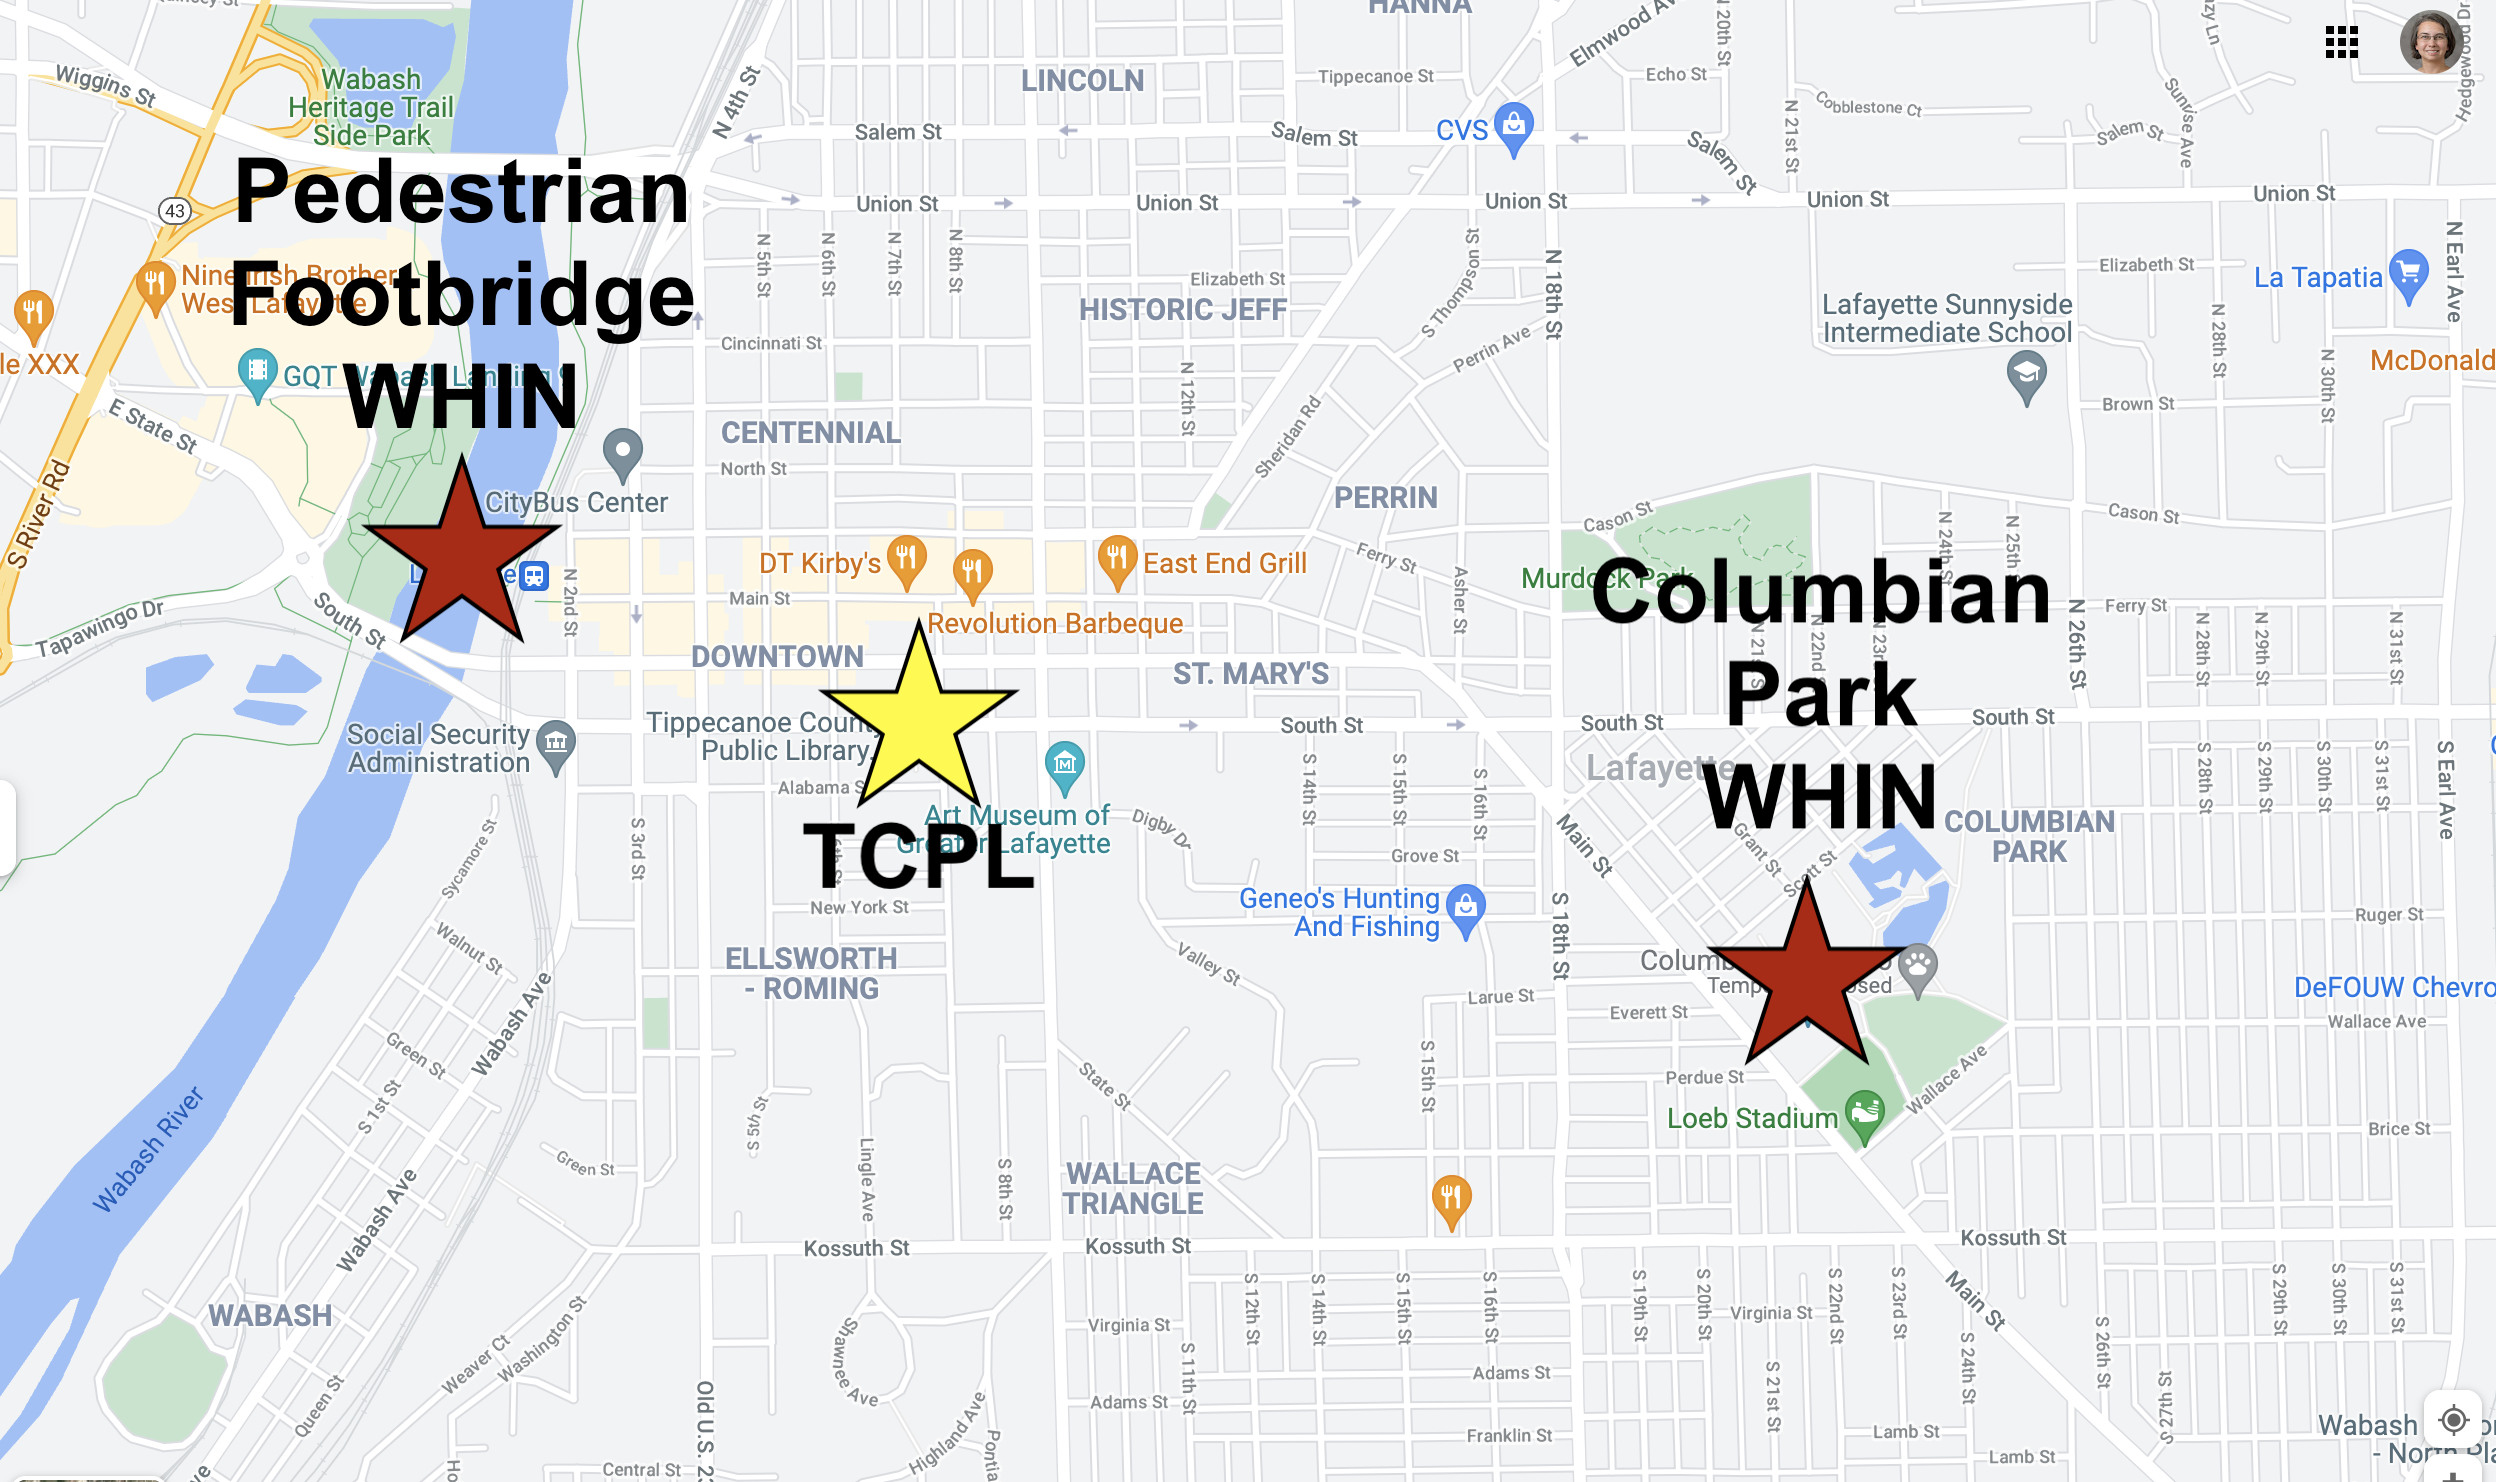
Base map courtesy of Google Maps.

## So, the hypothesis we need to test is:

### Null hypothesis: Winds speeds uphill from the TCPL are the same as those at or downhill from TCPL.

# $H_0: \mu(V_{\texttt{CP}}) = \mu(V_{\texttt{PB}})$

### Alternative hypothesis: Winds speeds uphill from the TCPL differ from those at or downhill from TCPL.

# $H_a: \mu(V_{\texttt{CP}}) \ne \mu(V_{\texttt{PB}})$

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Let's load the Columbian Park data.
Just typing the name of the DataFrame will give you both the head and tail with an ellipsis (...) in between.

In [2]:
# We'll use 
# "cp" for Columbian Park
# "pb" for Pedestrian Bridge
cp = pd.read_csv('columbian_park_2021.csv', parse_dates = ['observation_time'])
cp['name'] = 'Columbian Park' # Replacing the default name of the station (WHIN081E-TIPP009) because it's not very descriptive
cp

,station_id,latitude,longitude,name,observation_time,temperature,temperature_high,temperature_low,humidity,solar_radiation,...,wind_gust_direction_degrees,pressure,soil_temp_1,soil_temp_2,soil_temp_3,soil_temp_4,soil_moist_1,soil_moist_2,soil_moist_3,soil_moist_4
0,182,40.41309,-86.87257,Columbian Park,2021-03-26 16:45:00+00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,29.535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,182,40.41309,-86.87257,Columbian Park,2021-03-26 17:00:00+00:00,47.0,49.0,45.0,74.0,367.0,...,247.5,29.543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,182,40.41309,-86.87257,Columbian Park,2021-03-26 17:15:00+00:00,45.0,45.0,45.0,77.0,320.0,...,270.0,29.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,182,40.41309,-86.87257,Columbian Park,2021-03-26 17:30:00+00:00,45.0,45.0,45.0,79.0,291.0,...,225.0,29.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,182,40.41309,-86.87257,Columbian Park,2021-03-26 17:45:00+00:00,45.0,45.0,45.0,80.0,267.0,...,202.5,29.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20847,182,40.41309,-86.87257,Columbian Park,2021-11-01 02:45:00+00:00,46.0,46.0,45.0,69.0,0.0,...,292.5,30.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20848,182,40.41309,-86.87257,Columbian Park,2021-11-01 03:00:00+00:00,45.0,46.0,45.0,70.0,0.0,...,315.0,30.127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20849,182,40.41309,-86.87257,Columbian Park,2021-11-01 03:15:00+00:00,45.0,45.0,45.0,69.0,0.0,...,315.0,30.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20850,182,40.41309,-86.87257,Columbian Park,2021-11-01 03:30:00+00:00,45.0,45.0,45.0,69.0,0.0,...,270.0,30.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Most of the column headers are self-descriptive. 
More details about these data (like units and update frequency) are given here: https://data.whin.org/data/current-conditions

Now load the Pedestrian Bridge data:

In [3]:
pb = pd.read_csv('pedestrian_bridge_2021.csv', parse_dates = ['observation_time'])
pb

,station_id,latitude,longitude,name,observation_time,temperature,temperature_high,temperature_low,humidity,solar_radiation,...,wind_gust_direction_degrees,pressure,soil_temp_1,soil_temp_2,soil_temp_3,soil_temp_4,soil_moist_1,soil_moist_2,soil_moist_3,soil_moist_4
0,44,40.41936,-86.89753,Pedestrian Bridge,2021-01-01 05:00:00+00:00,26.0,26.0,26.0,81.0,0.0,...,0.0,30.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44,40.41936,-86.89753,Pedestrian Bridge,2021-01-01 05:15:00+00:00,26.0,26.0,26.0,81.0,0.0,...,0.0,30.372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44,40.41936,-86.89753,Pedestrian Bridge,2021-01-01 05:30:00+00:00,26.0,26.0,26.0,81.0,0.0,...,0.0,30.372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44,40.41936,-86.89753,Pedestrian Bridge,2021-01-01 05:45:00+00:00,26.0,26.0,26.0,81.0,0.0,...,0.0,30.364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44,40.41936,-86.89753,Pedestrian Bridge,2021-01-01 06:00:00+00:00,27.0,27.0,26.0,81.0,0.0,...,67.5,30.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29169,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 02:45:00+00:00,47.0,47.0,47.0,69.0,0.0,...,315.0,30.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29170,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:00:00+00:00,47.0,47.0,47.0,69.0,0.0,...,292.5,30.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29171,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:15:00+00:00,46.0,47.0,46.0,69.0,0.0,...,337.5,30.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29172,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:30:00+00:00,46.0,46.0,46.0,70.0,0.0,...,315.0,30.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# First things first. The Pedestrian Footbridge station has collected data for all of 2021. The Columbian Park station only started collecting data on 26 March 2021, when it was installed. 
### Let's drop all the rows of the Pedestrian bridge data that precede the start of the Columbian Park data.

In [4]:
startDate = cp['observation_time'].min() # Should be on 26 March 2021
print("Start Date: ",startDate) 
pb = pb[pb['observation_time'] >= startDate]
pb

Start Date:  2021-03-26 16:45:00+00:00


,station_id,latitude,longitude,name,observation_time,temperature,temperature_high,temperature_low,humidity,solar_radiation,...,wind_gust_direction_degrees,pressure,soil_temp_1,soil_temp_2,soil_temp_3,soil_temp_4,soil_moist_1,soil_moist_2,soil_moist_3,soil_moist_4
8109,44,40.41936,-86.89753,Pedestrian Bridge,2021-03-26 16:45:00+00:00,45.0,45.0,44.0,80.0,252.0,...,180.0,30.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8110,44,40.41936,-86.89753,Pedestrian Bridge,2021-03-26 17:00:00+00:00,45.0,45.0,45.0,81.0,318.0,...,202.5,30.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8111,44,40.41936,-86.89753,Pedestrian Bridge,2021-03-26 17:15:00+00:00,45.0,45.0,45.0,81.0,287.0,...,180.0,30.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8112,44,40.41936,-86.89753,Pedestrian Bridge,2021-03-26 17:30:00+00:00,45.0,45.0,45.0,82.0,226.0,...,225.0,30.127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8113,44,40.41936,-86.89753,Pedestrian Bridge,2021-03-26 17:45:00+00:00,46.0,46.0,45.0,81.0,232.0,...,247.5,30.117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29169,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 02:45:00+00:00,47.0,47.0,47.0,69.0,0.0,...,315.0,30.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29170,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:00:00+00:00,47.0,47.0,47.0,69.0,0.0,...,292.5,30.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29171,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:15:00+00:00,46.0,47.0,46.0,69.0,0.0,...,337.5,30.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29172,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:30:00+00:00,46.0,46.0,46.0,70.0,0.0,...,315.0,30.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let's also dump any rows that don't have matches in the other data set. 
We'll use the DataFrame.isin() method for this, as we did in the WXT exercise.

In [5]:
pb = pb[pb['observation_time'].isin(cp['observation_time'])] # Drop any rows of pb without matches in cp
cp = cp[cp['observation_time'].isin(pb['observation_time'])] # Drop any rows of cp without matches in pd
print("Length of Columbian Park data: ", len(cp))
print("Length of Pedestrian Footbridge data: ", len(pb))

Length of Columbian Park data:  20848
Length of Pedestrian Footbridge data:  20848


# With our data now matched, let's make a scatterplot.

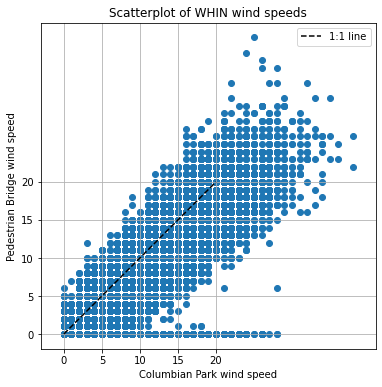

In [6]:
fig = plt.figure(figsize = (6, 6))
plt.scatter(cp['wind_gust_speed_mph'], pb['wind_gust_speed_mph'])
plt.plot([0, 20], [0, 20], 'k--', label = "1:1 line")
plt.axis('equal')
plt.grid()
plt.xlabel('Columbian Park wind speed')
plt.ylabel('Pedestrian Bridge wind speed')
plt.xticks(np.arange(0, 25, 5)) # Place x-ticks every 5 units from 0 to 25
plt.yticks(np.arange(0, 25, 5)) # Place y-ticks every 5 units from 0 to 25
plt.title('Scatterplot of WHIN wind speeds')
plt.legend()

Something isn't right about the Pedestrian Bridge data (too many zeros), but let's come back to that later.

# It's evident that the wind measurements are rounded off to the nearest 1 mph. 
The WHIN stations are commercial-off-the-shelf Davis Vantage Pro 2 weather stations. The 1-mph rounding is consistent with what's reported in the Davis Vantage Pro 2 manual. (Most home users don't need measurement resolution better than 1 mph.)

# Eyeballing the scatterplot, it looks like the distribution is a bit "saggy"; i.e., there are more points below the 1:1 line than above it.
Let's try to quantify that intution.

# Let's stick the two DataFrames together and use Seaborn to make some plots.
Seaborn prefers we feed it a single, giant DataFrame object instead of multiple, smaller ones. The command below appends the "pb" DataFrame to the "cb" DataFrame and names the resulting DataFrame "whin".

In [13]:
whin = cp.append(pb, ignore_index = True)
whin

,station_id,latitude,longitude,name,observation_time,temperature,temperature_high,temperature_low,humidity,solar_radiation,...,wind_gust_direction_degrees,pressure,soil_temp_1,soil_temp_2,soil_temp_3,soil_temp_4,soil_moist_1,soil_moist_2,soil_moist_3,soil_moist_4
0,182,40.41309,-86.87257,Columbian Park,2021-03-26 16:45:00+00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,29.535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,182,40.41309,-86.87257,Columbian Park,2021-03-26 17:00:00+00:00,47.0,49.0,45.0,74.0,367.0,...,247.5,29.543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,182,40.41309,-86.87257,Columbian Park,2021-03-26 17:15:00+00:00,45.0,45.0,45.0,77.0,320.0,...,270.0,29.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,182,40.41309,-86.87257,Columbian Park,2021-03-26 17:30:00+00:00,45.0,45.0,45.0,79.0,291.0,...,225.0,29.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,182,40.41309,-86.87257,Columbian Park,2021-03-26 17:45:00+00:00,45.0,45.0,45.0,80.0,267.0,...,202.5,29.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41691,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 02:45:00+00:00,47.0,47.0,47.0,69.0,0.0,...,315.0,30.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41692,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:00:00+00:00,47.0,47.0,47.0,69.0,0.0,...,292.5,30.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41693,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:15:00+00:00,46.0,47.0,46.0,69.0,0.0,...,337.5,30.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41694,44,40.41936,-86.89753,Pedestrian Bridge,2021-11-01 03:30:00+00:00,46.0,46.0,46.0,70.0,0.0,...,315.0,30.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that the new "whin" Dataframe has twice as many rows as the cp or pb DataFrame, indicating that the append operation was succesful.

# With the two DataFrames combined into one, we can easily compute the means of the two data sets and display them using Pandas' "groupby" function:

In [14]:
whin.groupby(by = 'name')['wind_speed_mph'].mean()

name
Columbian Park       4.572957
Pedestrian Bridge    3.483924
Name: wind_speed_mph, dtype: float64

# It does, indeed, appear that the average wind speed measured at Columbian Park is greater than that at the Pedestrian Bridge.

# Let's practice plotting the time series of wind speeds using the Seaborn library.
In the example below , I use "sns" (an alias for seaborn) instead of "plt" (an alias for the "pyplot" module of matplotlib).

Text(0.5, 1.0, 'WHIN wind speeds in 2021')

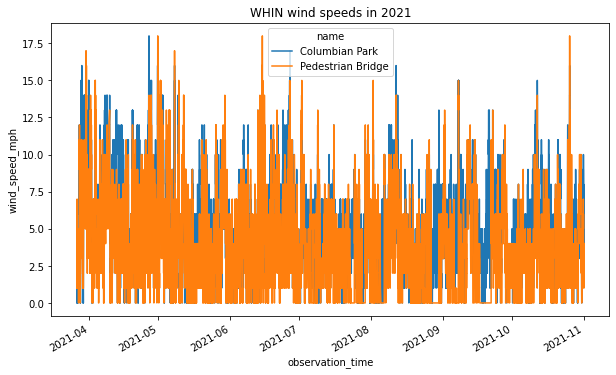

In [15]:
fig = plt.figure(figsize = (10, 6)) 
ax = plt.subplot(111)
sns.lineplot(data = whin, x = 'observation_time', y = 'wind_speed_mph', hue = 'name')
fig.autofmt_xdate()  # Handy command that rotates and scales x-axis time labels so they are easier to read
plt.title('WHIN wind speeds in 2021')

# Looking at the two time series plotted together, it does appear that the Columbian Park station records slightly higher winds than the Pedestrian bridge station. 
The blue points peek up over the orange ones most of the time.

You may be wondering what the big deal is with Seaborn; I could have just made these plots with Matplotlib and they would have looked almost identical. 

# The beauty of Seaborn can be demonstrated by making a histogram of wind speeds from both stations with a single command.

<AxesSubplot:xlabel='wind_speed_mph', ylabel='Count'>

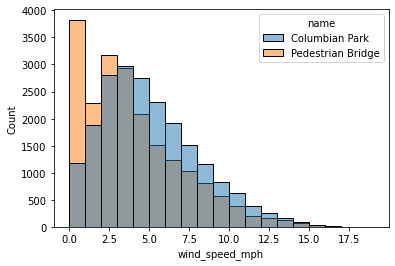

In [16]:
sns.histplot(data = whin, x = 'wind_speed_mph', hue = 'name', bins = np.arange(0, 20, 1))

Note that the overlapping areas are drawn in gray / purple.
# Now let's make a joint histogram:

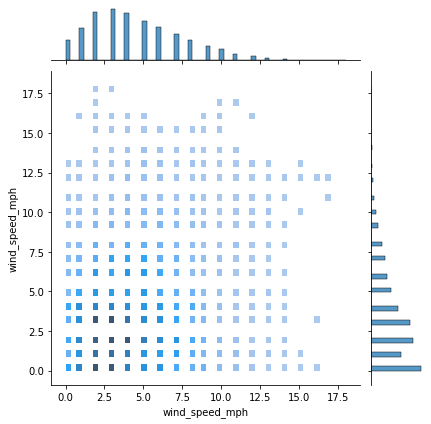

In [17]:
sns.jointplot(x=cp["wind_speed_mph"], y=pb["wind_speed_mph"], kind = "hist")

# How about a box-and-whisker plot?
Again, these are mainly demos you might be able to use in your projects. See the <a href = "https://seaborn.pydata.org/index.html">Seaborn gallery</a> for more examples.

<AxesSubplot:xlabel='name', ylabel='wind_speed_mph'>

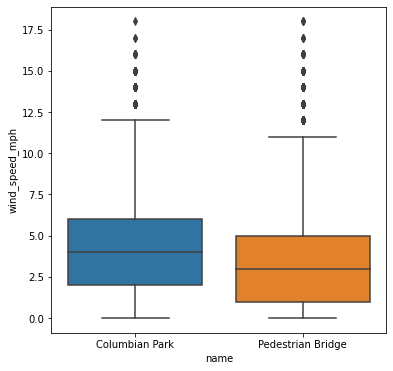

In [18]:
fig = plt.figure(figsize = (6, 6))
sns.boxplot(data = whin, x = "name", y = "wind_speed_mph")

## All of these plots basically tell the same story: The winds at Columbian park tend to be greater than those at Pedestrian bridge.
There's quite a bit of overlap, however, so the distributions aren't that far apart.

# Let's revisit the librarian's question:
<blockquote> <span style="color:darkblue">Question:  Does the Downtown Library location on South Street provide any protection from high winds and [...] possible severe weather damages. Specifically, are we more protected in the valley created by Wabash River, between the hillside of West Lafayette and the high point of Five Points intersection in Lafayette?</span></blockquote>

## The query is about <i>storm</i> winds, so gusts (maximum winds) might be a better measure.
Again, we can compute the means:

In [19]:
whin.groupby(by = 'name')['wind_gust_speed_mph'].mean()

name
Columbian Park       10.237817
Pedestrian Bridge     7.632723
Name: wind_gust_speed_mph, dtype: float64

## At first glance, it looks like we might be onto something. The Pedestrian bridge has significantly lower gusts than Columbian Park. 

# However, recall that the Pedestrian Bridge station recorded more 0-mph winds than Columbian Park station.
## Does the same observation extend to the gusts?

<AxesSubplot:xlabel='wind_gust_speed_mph', ylabel='Count'>

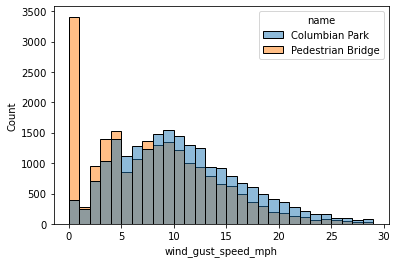

In [20]:
sns.histplot(data = whin, x = 'wind_gust_speed_mph', hue = 'name', bins = np.arange(0, 30, 1))

# Yes! In fact, there are a large number of 0-mph "gusts" at the Pedestrian Bridge.
I inquired with Zach Mason (WHIN) about this; he responded:
<blockquote>[W]e had an intern do some basic quality control analysis last summer and he seemed to detect sporadic outages of the anemometer on the Pedestrian bridge, but we have yet to follow up on that project.</blockquote>

# It makes no sense for a wind gust to be 0 mph. Let's drop those. 
How does that impact the means?

In [21]:
whin = whin[whin['wind_gust_speed_mph']>0.] # Keep only rows containing gusts > 0 mph
means = whin.groupby(by = 'name')['wind_gust_speed_mph'].mean()
means

name
Columbian Park       10.430435
Pedestrian Bridge     9.124255
Name: wind_gust_speed_mph, dtype: float64

## The mean for Columbian Park doesn't change that much, but the mean wind gust for the Pedestrian footbridge increases significantly.

# Look up the accuracy / uncertainty in the wind speeds in the Davis Vantage Pro 2 Manual. 
Hint: The relevant information starts on p. 55.
# How does it compare to the difference in these mean wind gusts?
If the difference of means is less than the uncertainty, then that's a pretty good indication that the two distributions are statistically indistinct. 
# How does it compare to the standard deviation of the wind gusts?

In [22]:
stds = whin.groupby(by = 'name')['wind_gust_speed_mph'].std()
stds

name
Columbian Park       5.787014
Pedestrian Bridge    5.321919
Name: wind_gust_speed_mph, dtype: float64

# These are the sigma ($\sigma$) values of our distributions.
This assumes that the two distributions can be expected to be normal. That's a questionable assumption, as a significant part of the left tail of both distributions extends below 0 mph, as shown below.

Text(0.5, 1.0, 'Wind Gust Probabilities')

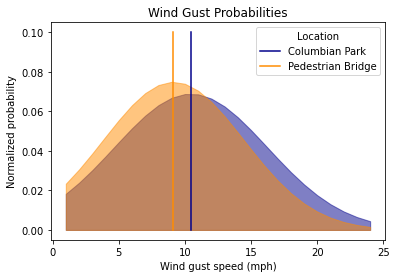

In [23]:
speeds = np.arange(1, 25, 1)
for loc, color in zip(['Columbian Park', 'Pedestrian Bridge'], ['darkblue', 'darkorange']):
    plt.plot([means[loc], means[loc]], [0, 0.1], color = color, label = loc)
    plt.fill_between(speeds, stats.norm.pdf(speeds, means[loc], stds[loc]), color = color, alpha = 0.5)
plt.legend(title = 'Location')
plt.xlabel('Wind gust speed (mph)')
plt.ylabel('Normalized probability')
plt.title('Wind Gust Probabilities')

Strictly speaking, it would be inappropriate to proceed with a Student's T-test in this situation. 

It's unclear to me (Prof. Tanamachi) whether the underlying distribution of wind gusts would be expected to be exponential (or some other standard statistical distribution); I need to consult with some of my colleagues more knowledgeable about stats.

# Instead, observe the degree to which the two distributions of wind gusts overlap.

# Observe the difference in mean gust speeds, and compare it to the reported uncertainty of the anemometer in the Davis Vantage Pro 2 manual.

# Based on these results, do you accept or reject the null hypothesis?
For this lab report, it's okay for your conclusion to be subjective, rather than statistical.

# In the Conclusions section of your lab report, draft an email response to the librarian, directly addressing their inquiry as though you were a professional consultant.

# Good luck!